In [1]:
!pip install pennylane --upgrade

import your favourate libraries

In [2]:
import pennylane as qml
from pennylane import numpy as pnp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

create a device with 2 qubits


In [3]:
dev = qml.device("default.qubit",wires = 2)

 Create a QNode with 2 entangled qubits(Bell state). Return the probabilities for each state

In [4]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires = 0)
    qml.CNOT(wires =[0,1])
    return qml.probs()

Drawc your Circuit

Matplotlib is building the font cache; this may take a moment.


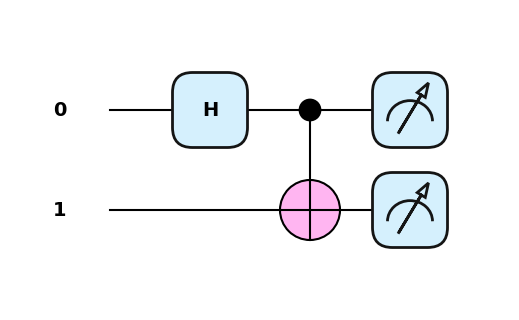

In [5]:
qml.draw_mpl(circuit,style='pennylane')();

Run your circuit

In [6]:
circuit()

tensor([0.5, 0. , 0. , 0.5], requires_grad=True)

Introduction to QML

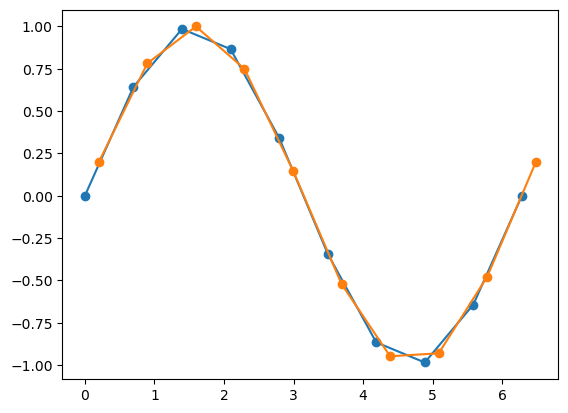

In [7]:
X = pnp.linspace(0,2*pnp.pi, 10) #training data
Y = pnp.sin(X) #labels of data
#generate test data
X_test = pnp.linspace(0.2, 2*pnp.pi + 0.2,10)
Y_test = pnp.sin(X_test) #labels of test data

plt.plot(X,Y, 'o-')
plt.plot(X_test, Y_test, 'o-')

In [8]:
dev = qml.device("default.qubit", wires = 1)

In [9]:
@qml.qnode(dev)
def quantum_circuit(datapoint, params):
#Encoding
    qml.RX(datapoint, wires = 0)
#Ansatz
    qml.RY(params[0], wires = 0)
    qml.RX(params[1], wires = 0)
    return qml.expval(qml.PauliZ(wires=0))
 

Draw your circuit in PennyLane Sytle

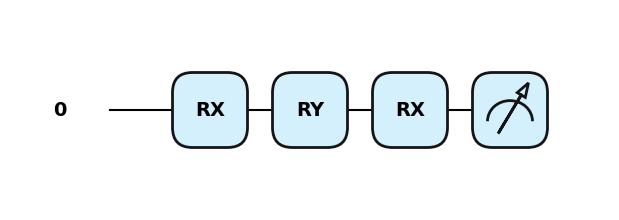

In [10]:
qml.draw_mpl(quantum_circuit, style = 'pennylane')(0.1, [0.2,0.3]);

In [11]:
# Classical pre-processing
def preprocess_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.reshape(-1, 1))
    return X_scaled.flatten(), scaler

In [12]:
# Classical post-processing
def postprocess_output(output):
    return pnp.sign(output)

In [13]:
# Define cost function
def cost_function(params, X, y):
    predictions = [quantum_circuit(x, params) for x in X]
    processed_predictions = [postprocess_output(pred) for pred in predictions]
    return pnp.mean((pnp.array(processed_predictions) - y) ** 2)


In [14]:
# Generate synthetic data
X = pnp.random.uniform(-pnp.pi, pnp.pi, 100)
y = pnp.sign(pnp.sin(X))

In [15]:
# Preprocess data
X_scaled, scaler = preprocess_data(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize parameters
init_params = pnp.random.uniform(0, 2 * pnp.pi, size=2)

# Optimize the circuit
opt = qml.GradientDescentOptimizer(stepsize=0.3)
steps = 100

In [16]:
params = init_params
for i in range(steps):
    params = opt.step(lambda p: cost_function(p, X_train, y_train), params)
    if (i + 1) % 10 == 0:
        cost = cost_function(params, X_train, y_train)
        print(f"Step {i+1}, Cost: {cost:.4f}")

C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 10, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 20, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 30, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 40, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 50, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 60, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 70, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 80, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 90, Cost: 0.0500


C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\MUFTAWU MUGSINU\anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independ

Step 100, Cost: 0.0500


In [17]:
# Test predictions
def test_predictions(X, params):
    predictions = [quantum_circuit(x, params) for x in X]
    return [postprocess_output(pred) for pred in predictions]

y_pred = test_predictions(X_test, params)
accuracy = pnp.mean(y_pred == y_test)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 1.0000


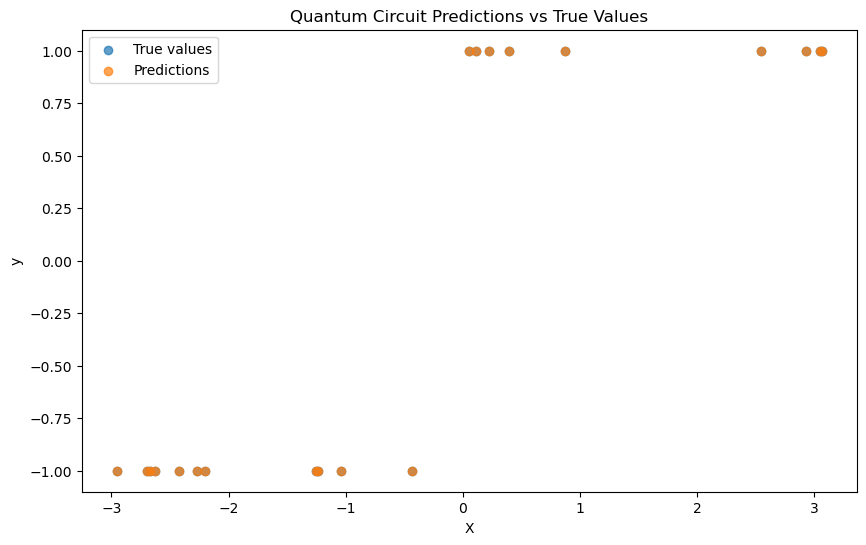

In [18]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scaler.inverse_transform(X_test.reshape(-1, 1)), y_test, label='True values', alpha=0.7)
plt.scatter(scaler.inverse_transform(X_test.reshape(-1, 1)), y_pred, label='Predictions', alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Quantum Circuit Predictions vs True Values')
plt.legend()
plt.show()

Classical Pre/Post  Processing

In [19]:
def loss_func(predictions, targets):
    
    total_loss = 0
    
    for i in range(len(targets)):
        label = targets[i]
        prediction = predictions[i]
        loss = (prediction - label)**2
        total_loss += loss
        
    return total_loss


Define your cost function, including any classical pre/post processing

In [20]:
def cost_fn(params, X, Y):
    predictions = [quantum_circuit(x, final_params) for x in X]
    cost = loss_func(predictions, Y)
    return cost

In [21]:
opt = qml.GradientDescentOptimizer(stepsize = 0.3)

init_params = pnp.array([0.1,0.1], requires_grad = True)

X.requires_grad = False

max_iter = 100

def optimization_routine(max_iter, opt, cost_fn,params, X, Y):
    for i in range(max_iter):
        
        [params,_,_], prev_cost = opt.step_and_cost(cost_fn,params,X,Y)
        
        return params
    
    params = optimization_routine(max_iter,opt,cost_fn,init_params,X,Y)
        
print(params)
print(cost)    

[1.10597727 4.28909763]
0.05


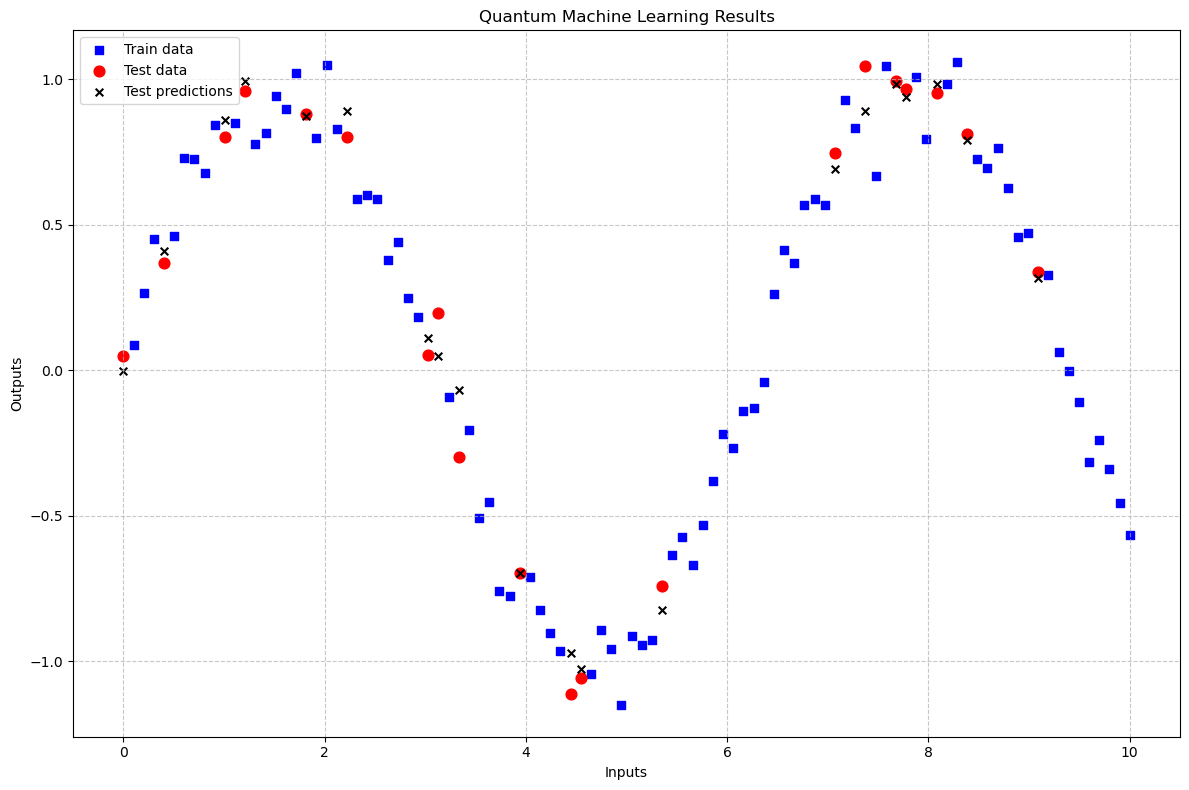

Training data size: X = (80,), Y = (80,)
Testing data size: X = (20,), Y = (20,)
Predictions size: (20,)


In [22]:
import matplotlib.pyplot as plt
import numpy as pnp
from sklearn.model_selection import train_test_split

# Generate sample data
pnp.random.seed(42)
num_samples = 100
X = pnp.linspace(0, 10, num_samples)
Y = pnp.sin(X) + pnp.random.normal(0, 0.1, num_samples)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def quantum_circuit(x, params):
    # Placeholder for quantum circuit function
    # Replace this with your actual quantum circuit implementation
    return pnp.sin(x) + pnp.random.normal(0, 0.05)  # This is just a simple placeholder

# Generate test predictions
params = None  # Replace with actual parameters if needed
test_predictions = pnp.array([quantum_circuit(x, params) for x in X_test])

def plot_results(X_train, Y_train, X_test, Y_test, test_predictions):
    plt.figure(figsize=(12, 8))
    
    plt.scatter(X_train, Y_train, s=30, c='b', marker="s", label='Train data')
    plt.scatter(X_test, Y_test, s=60, c='r', marker="o", label='Test data')
    plt.scatter(X_test, test_predictions, s=30, c='k', marker="x", label='Test predictions')
    
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    plt.title("Quantum Machine Learning Results")
    
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot results
plot_results(X_train, Y_train, X_test, Y_test, test_predictions)

# Print sizes to verify
print(f"Training data size: X = {X_train.shape}, Y = {Y_train.shape}")
print(f"Testing data size: X = {X_test.shape}, Y = {Y_test.shape}")
print(f"Predictions size: {test_predictions.shape}")

In [23]:
test_predictions = [quantum_circuit(x_test,params) for x_test in X_test]

def plot_results(X,Y,X_test, Y_test, test_predictions):
    fig = plt.figure()
    ax1 = fig.add_sunplot(111)
    
    ax1.scatter(X, Y, s=30, c='b', marker="s" , label = 'Train labels')
    ax1.scatter(X_test, Y_test, s=60, c='r', marker="o" , label = 'Test labels')
    ax1.scatter(X_test, test_predictions, s=30, c='k', marker="x" , label = 'Test predictions')
    plt.xlabel("Inputs")
    plt.ylabel("Labels")
    plt.tittle("QML results")
    
    plt.lagend(loc='upper right')
    plt.show()
    
    plot_results(X,Y,X_test,Y_test,test_prediction)